In [1]:
## Figure 9 - Compare DEM error correction on Cerro Azul with ALOS data and show the estimated step functions
%matplotlib inline
import os
import numpy as np
from matplotlib import pyplot as plt, ticker
from pysar.simulation.plot import *
from pysar.objects import sensor, timeseries
from pysar.utils import ptime, readfile, plot as pp, utils as ut
from pysar import view

work_dir = os.path.expanduser('~/development/python/2018_ComputGeosci_PySAR')
print('Done.')

Done.


save figure to file: CerroAzul_dike_step.png


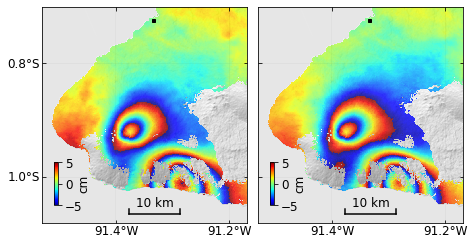

In [72]:
## Plot
print_msg = False
proj_dirs = os.path.expanduser('~/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE')
step_file = os.path.join(proj_dir, 'geo_timeseriesStepModel.h5')
ts_file   = os.path.join(proj_dir, 'geo_timeseries_ECMWF_ramp_demErr.h5')
mask_file = os.path.join(proj_dir, 'geo_maskTempCoh.h5')
dem_file  = os.path.join(proj_dir, '../../DEM/demLat_S02_N01_Lon_W092_W090.dem.wgs84')

fnames = ['{} 20170401 --ref-date 20170320 -m {}'.format(ts_file, mask_file),
          '{} 20170321 -m {}'.format(step_file, mask_file)]
lalo_locs = ['1 0 0 1', '0 0 0 1']

# Plot
wrap_range = [-5, 5]  #-5,5; -10,10
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[6, 3])
for i in range(len(fnames)):
    cmd = 'view.py {} --dem {} --dem-nocontour '.format(fnames[i], dem_file)
    cmd += '--sub-lat -1.08 -0.70 --sub-lon -91.53 -91.17 '      #Cerro Azul only
    cmd += '--wrap --wrap-range {} {} '.format(wrap_range[0], wrap_range[1])
    cmd += '--scalebar 0.3 0.55 0.04 --scalebar-pad 0.05 '
    cmd += '--notitle --lalo-step 0.2 --fontsize 12 --nocbar --lalo-loc {} '.format(lalo_locs[i])
    cmd += '--ref-lalo -0.7235 -91.3340 --ref-size 3 '
    data, atr, inps = view.prep_slice(cmd, print_msg=print_msg)
    im = view.plot_slice(axs.flatten()[i], data, atr, inps, print_msg=print_msg)[2]
plt.tight_layout(pad=0)

# colorbar
caxs = []
caxs.append(fig.add_axes([0.04, 0.08, 0.01, 0.20]))
caxs.append(fig.add_axes([0.54, 0.08, 0.01, 0.20]))
for cax in caxs:
    cbar = plt.colorbar(im, cax=cax, ticks=[wrap_range[0], 0, wrap_range[1]], orientation='vertical')
    cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
    cbar.set_label('cm', fontsize=font_size, labelpad=-5)

# output
out_file = 'CerroAzul_dike_step.png'
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file:', out_file)
plt.show()

save figure to file: CerroAzul_dike_step.png


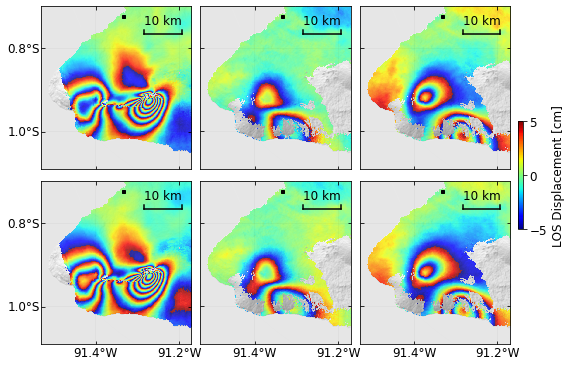

In [2]:
## Plot obsolete version

print_msg = False
step_files = []
ts_files   = []
mask_files = []
proj_dirs = [os.path.expanduser('~/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR/GEOCODE'),
             os.path.expanduser('~/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE'),
             os.path.expanduser('~/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE')]
for proj_dir in proj_dirs:
    step_files.append(os.path.join(proj_dir, 'geo_timeseriesStepModel.h5'))
    ts_files.append(os.path.join(proj_dir, 'geo_timeseries_ECMWF_ramp_demErr.h5'))
    mask_files.append(os.path.join(proj_dir, 'geo_maskTempCoh.h5'))
dem_file = os.path.join(proj_dir, '../../DEM/demLat_S02_N01_Lon_W092_W090.dem.wgs84')
fnames = ['{} 20080604 --ref-date 20080304 -m {}'.format(ts_files[0], mask_files[0]),
          '{} 20170320 --ref-date 20170308 -m {}'.format(ts_files[1], mask_files[1]),
          '{} 20170401 --ref-date 20170320 -m {}'.format(ts_files[2], mask_files[2]),
          '{} 20080529 -m {}'.format(step_files[0], mask_files[0]),
          '{} 20170319 -m {}'.format(step_files[1], mask_files[1]),
          '{} 20170321 -m {}'.format(step_files[2], mask_files[2])]
lalo_locs = ['1 0 0 0',
             '0 0 0 0',
             '0 0 0 0',
             '1 0 0 1',
             '0 0 0 1',
             '0 0 0 1']

# Plot
wrap_range = [-5, 5]  #-5,5; -10,10
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=[7, 5])
for i in range(len(fnames)):
    cmd = 'view.py {} --dem {} --dem-nocontour '.format(fnames[i], dem_file)
    cmd += '--sub-lat -1.09 -0.70 --sub-lon -91.53 -91.17 '      #Cerro Azul only
    #cmd += '--sub-lat -1.09 -0.70 --sub-lon -91.53 -91.05 '      #Cerro Azul and Sierra Negra
    cmd += '--wrap --wrap-range {} {} '.format(wrap_range[0], wrap_range[1])
    cmd += '--scalebar 0.3 0.81 0.83 --scalebar-pad 0.08 '
    cmd += '--notitle --lalo-step 0.2 --fontsize 12 --nocbar --lalo-loc {} '.format(lalo_locs[i])
    cmd += '--ref-lalo -0.7235 -91.3340 --ref-size 3 '
    data, atr, inps = view.prep_slice(cmd, print_msg=print_msg)
    im = view.plot_slice(axs.flatten()[i], data, atr, inps, print_msg=print_msg)[2]

## POI
#axs[0].plot(pts_lon, pts_lat, '*', ms=10, mfc='none', color='k', mew=1)
plt.tight_layout(pad=1)

# colorbar
fig.subplots_adjust(right=0.95)
cax = fig.add_axes([0.965, 0.35, 0.01, 0.3])
cbar = plt.colorbar(im, cax=cax, ticks=[wrap_range[0], 0, wrap_range[1]])
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label('LOS Displacement [cm]', fontsize=font_size, labelpad=5)

out_file = 'CerroAzul_dike_step.png'
#plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file:', out_file)
plt.show()